In [3]:
import pandas as pd
pd.options.display.max_columns = 100

In [4]:
muts_df = pd.read_pickle("./data/4_6_df.pkl")
muts_df.shape

(2537, 44)

In [5]:
assoc_gen_feat_df = pd.DataFrame()
for _, m in muts_df.iterrows():
    for g in m["genetic features"]:
        if g["significantly associated conditions"] == set(["511145", "M9"]):
            assoc_gen_feat_df = assoc_gen_feat_df.append({"experiment": m.exp, "genetic feature": g["name"]}, ignore_index=True)
#             assoc_gen_feat_df = assoc_gen_feat_df.append(m, ignore_index=True)
assoc_gen_feat_df.head()

,experiment,genetic feature
0,C13,rph
1,C13,rph
2,Central_carbon_knockout_PTS,cyaA
3,Central_carbon_knockout_pgi,rpoC
4,Central_carbon_knockout_pgi,cyaA


In [6]:
assoc_gen_feat_df.groupby(["experiment", "genetic feature"]).size().reset_index(name="mutation frequency")

,experiment,genetic feature,mutation frequency
0,C13,rph,2
1,Central_carbon_knockout_PTS,cyaA,1
2,Central_carbon_knockout_pgi,cyaA,1
3,Central_carbon_knockout_pgi,rpoC,1
4,Central_carbon_knockout_tpiA,rpoC,1
5,GYD,pyrE/rph,1
6,GYD,rph,1
7,GYD,rpoB,5
8,PGI,cyaA,1
9,PGI,rpoC,1


In [7]:
cross_counts_df = pd.crosstab(
    assoc_gen_feat_df["genetic feature"],
    assoc_gen_feat_df["experiment"]
)
cross_counts_df

experiment,C13,Central_carbon_knockout_PTS,Central_carbon_knockout_pgi,Central_carbon_knockout_tpiA,GYD,PGI,SSW_AC,SSW_GLU_AC,SSW_GLU_GLY,SSW_GLU_XYL,SSW_XYL
genetic feature,,,,,,,,,,,
cyaA,0,1,1,0,0,1,0,0,0,0,0
pyrE/rph,0,0,0,0,1,0,1,0,0,4,4
rph,2,0,0,0,1,0,1,1,2,0,0
rpoB,0,0,0,0,5,0,0,4,2,0,0
rpoC,0,0,1,1,0,1,0,0,0,0,0


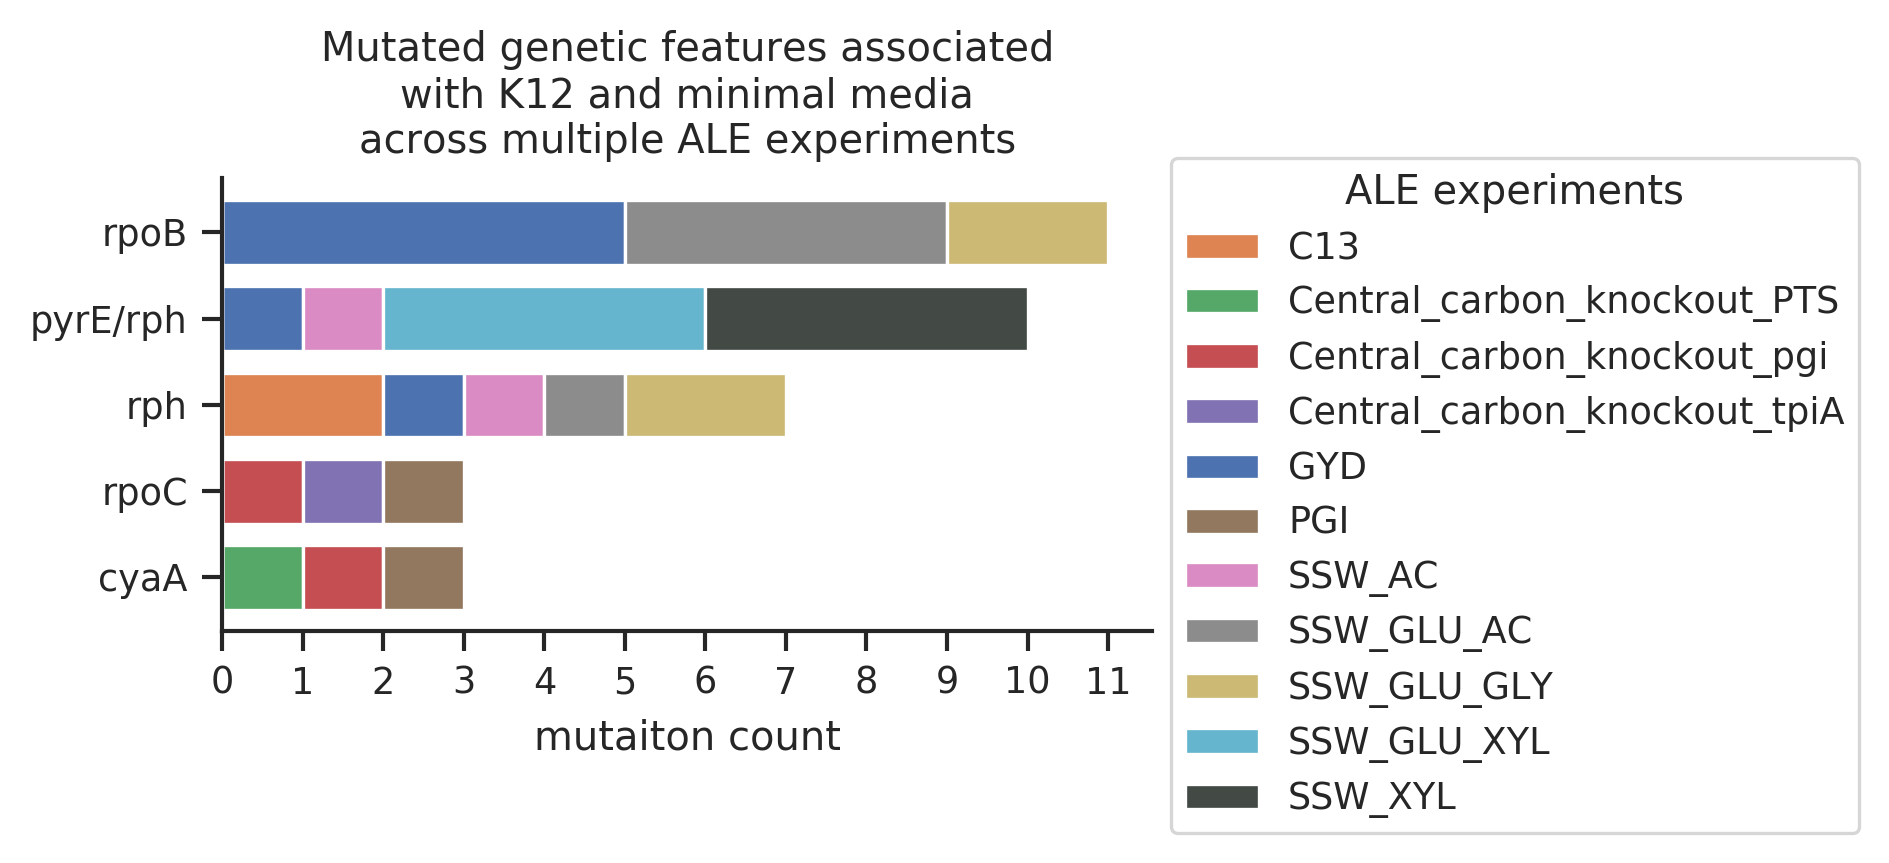

In [11]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("ticks")
import matplotlib.colors as mcolors


# Manual sorting for greatest to least
# cross_counts_df = cross_counts_df.reindex(["rpoB", "pyrE/rph", "rph", "rpoC", "cyaA"])
cross_counts_df = cross_counts_df.reindex(["cyaA", "rpoC", "rph", "pyrE/rph", "rpoB"])


# HACK: building palette where I want GYD to be a specific color.
# The color ordering (alphabetical) may change if more experiments are added.
pal=["#DD8452", "#55A868", "#C44E52", "#8172B3","#4C72B0", "#937860", "#DA8BC3", "#8C8C8C", "#CCB974", "#64B5CD", "#434a45"]
ax = cross_counts_df.plot.barh(stacked=True,
                               figsize=(4, 2),
                               width=0.75,
                               color=pal
                               )
sns.despine(ax=ax, top=True, right=True)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.3), title="ALE experiments")
ax.set_title(
    "Mutated genetic features associated\nwith K12 and minimal media\nacross multiple ALE experiments")
ax.set_ylabel('')
ax.set_xlabel("mutaiton count")
ax.xaxis.set_ticks(np.arange(0, 12, 1))